In [18]:
from astropy.io import fits
from astropy.cosmology import WMAP9
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hdulist = fits.open('../nsa.fits')
tbdata = hdulist[1].data
masses =  tbdata['MASS']
masses = masses*(0.7**2) #to account for the units of h^-2 Msun
sSFR = tbdata['B300']
mags = tbdata['ABSMAG']
u = mags[:,2]
r = mags[:,4]
NUV = mags[:,1]
z = tbdata['Z']
hdulist.close()

# Plot u - r vs mass

In [23]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)

In [24]:
ax.scatter(masses, u-r, s=0.1)
ax.set_xlabel('stellar mass (Msun)')
ax.set_ylabel('u-r (mag)')
ax.set_xlim(1E9, 1E11)
ax.set_ylim(0.5,3.5)
ax.semilogx()

[]

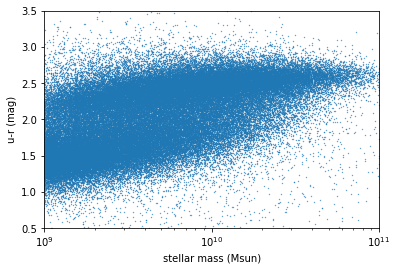

In [25]:
plt.savefig('../initial_plots/ur_color_mass.png')
plt.show()

# Plot NUV - r vs mass

In [40]:
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1,1,1)

In [41]:
ax2.scatter(masses, NUV - r, s=0.1)
ax2.set_xlabel('stellar mass (Msun)')
ax2.set_ylabel('NUV - r (mag)')
ax2.set_xlim(1E9, 1E11)
ax2.set_ylim(0,7)
ax2.semilogx()

[]

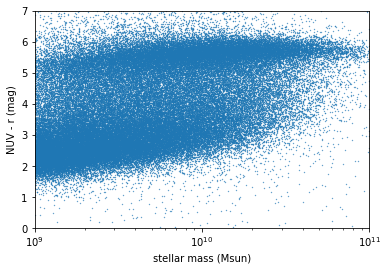

In [42]:
plt.savefig('../initial_plots/NUV_color_mass.png')
plt.show()

# Plot mass vs redshift

In [43]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1,1,1)

In [44]:
ax3.scatter(masses, z, s=0.1)
ax3.set_xlabel('stellar mass (Msun)')
ax3.set_ylabel('redshift')
ax3.set_ylim(0.03, 0.06)
ax3.set_xlim(1E7, 1E13)
ax3.semilogx()

[]

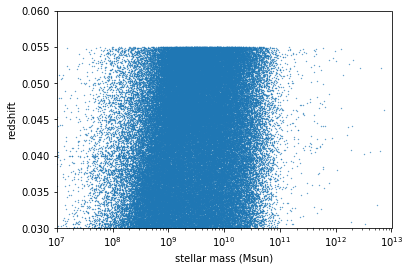

In [45]:
plt.savefig('../initial_plots/z_mass.png')
plt.show()

# Calculate luminosity at max redshift

In [4]:
print np.max(z)

0.0550015


In [21]:
max = np.max(z)
absmags = []
max_redshifts = []
for i in np.arange(len(z)):
    if z[i] >= max - (max*0.01):
        absmags.append(r[i])
        max_redshifts.append(z[i])
lums = WMAP9.luminosity_distance(max_redshifts)
print lums

[ 245.51949919  246.21761392  246.07098411 ...,  247.0035325   245.59784679
  245.59784679] Mpc


In [40]:
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(1,1,1)

ax4.scatter(lums, absmags, s=0.1)
ax4.set_xlabel('Luminosity Distance (Mpc)')
ax4.set_ylabel('r-band absolute magnitude (mags)')
#ax4.set_xlim(245, 248)
#ax4.set_xlim(1E7, 1E13)
#ax4.semilogx()

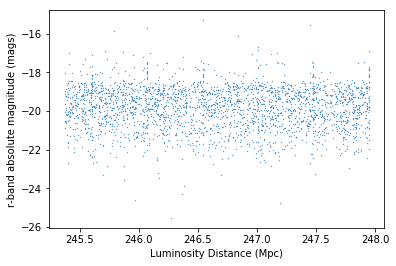

In [41]:
plt.savefig('../initial_plots/lum_dist_absmag.png')
plt.show()